# Advanced Clustering Techniques

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.decomposition import PCA

In [4]:
# Load the dataset
data = pd.read_csv("Su Ga - Lesson 10 Mall_Customers.csv")

In [5]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


##  DBSCAN Clustering

In [8]:
# Select features for clustering
features = data[['Annual Income (k$)', 'Spending Score (1-100)']]

In [9]:
# Standardize the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(features)

In [10]:
# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(scaled_data)

# Add DBSCAN labels to the data
data['DBSCAN_Cluster'] = dbscan_labels

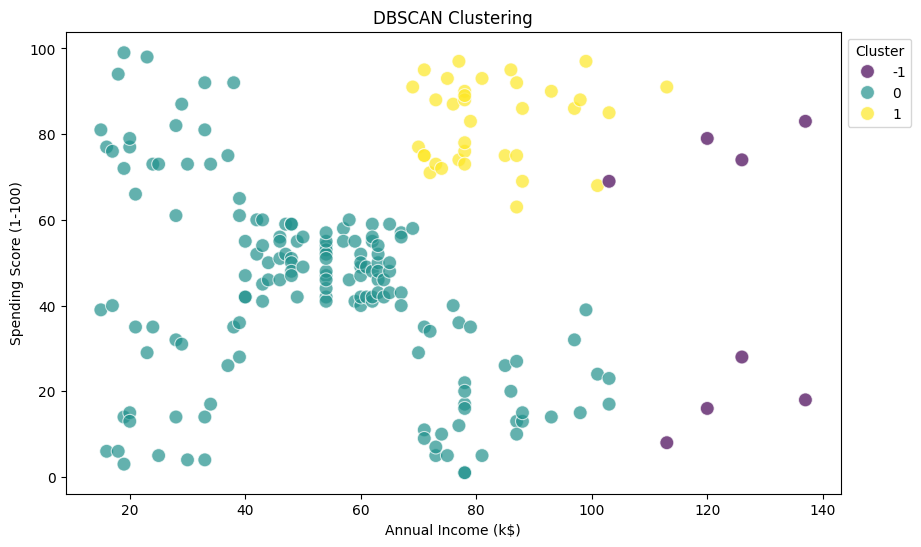

In [11]:
# Visualize the DBSCAN clustering results
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=data['Annual Income (k$)'], 
    y=data['Spending Score (1-100)'], 
    hue=data['DBSCAN_Cluster'], 
    palette='viridis', 
    s=100, 
    alpha=0.7
)

plt.title('DBSCAN Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster', bbox_to_anchor=(1, 1))
plt.show()

## Principal Component Analysis (PCA)

In [17]:
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

plt.figure(figsize=(10, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=kmeans.labels_, cmap='viridis', s=100, alpha=0.7)
plt.title('PCA Projection of Customer Data')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

AttributeError: 'KMeans' object has no attribute 'labels_'

<Figure size 1000x600 with 0 Axes>